# Task 1

We want to implement the epsioln greedy algorithm. The purpose of the algorithm is to balance exploration wiht exploitation.

Epsilon greedy will pick the best option except for epssilon times every 100 trials.

In this taks we want to explore a matrix where a row represent all the posible rewards that we can receive based on the state we are at the moment.


In [1]:
from random import random, randint

%matplotlib inline
import matplotlib.pylab as plt
from scipy import stats
import numpy as np


# Multi-armed bandits definitions
nb_bandits = 3  # Number of bandits
# We set the probability of winning for each bandit
p_bandits = [0.45, 0.55, 0.60]


def pull(i):
    """
    Pull arm of the bandit i
    return 1 if win, otherwise 0.
    """
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0
    
# The iterations where we want to plt the results
iterations_to_plot = [1, 10, 50, 100, 500, 10000]

In [10]:
def epsilon_greedy(q, epsilon=0.2):
    """
    The epsilon greedy funciotns that returns a random choice
    with a probability equal to epsilon, and the best choice
    the rest of the time.
    """
    epsilon_true = random() <= epsilon
    if epsilon_true:
        return randint(0, len(q) -1)
    else:
        max_value = max(q)
        return q.index(max_value)

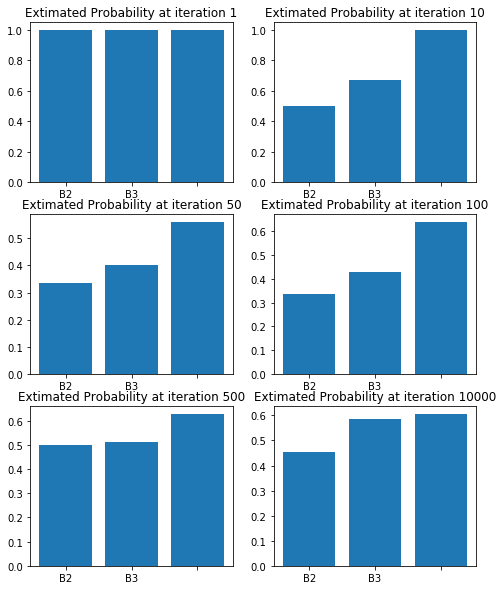

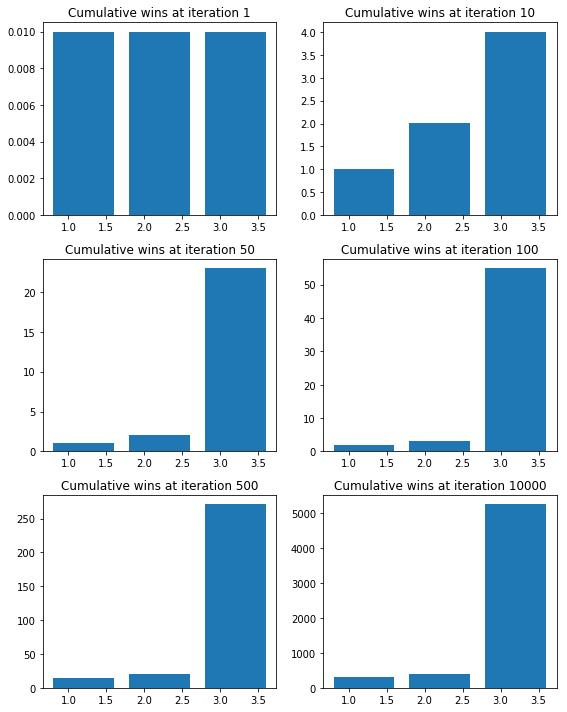

In [11]:
# Run the trail for `n` iteration
def run_simulation(n_iterations, iterations_to_plot, epsilon=0.2):

    # Setup plot
    fig1, axs1 = plt.subplots(3, 2, figsize=(8, 10))
#     [ for ax in axs]
    axs1 = axs1.flat
    fig2, axs2 = plt.subplots(3, 2, figsize=(8, 10))
    axs2 = axs2.flat

    # The number of trials and wins will represent the prior for each
    #  bandit with the help of the Beta distribution.
    trials = [0.01, 0.01, 0.01]  # Number of times we tried each bandit
    wins = [0.01, 0.01, 0.01]  # Number of wins for each bandit
    
    for iteration in range(1, n_iterations+1):
        # Define the prior based on current observations
        results = [w/t for w,t in zip(wins, trials)]
        if iteration in iterations_to_plot:
            ax1 = next(axs1)
            ax1.set_xticklabels(('B1', 'B2', 'B3'))
            ax1.bar([1, 2, 3], results)
            ax1.set_title(f'Estimated Probability at iteration {iteration:d}')
            ax2 = next(axs2)
            ax2.bar([1.2, 2.2, 3.2], wins)
#             ax2.set_ylabel('Cumulative wins', color='r')
            ax2.set_title(f'Cumulative wins at iteration {iteration:d}')

        # Use epsilon greedy to choose a bandit
        chosen_bandit = epsilon_greedy(results, epsilon)
        # Pull the bandit
        x = pull(chosen_bandit)
        # Update trials and wins (defines the posterior)
        trials[chosen_bandit] += 1
        wins[chosen_bandit] += x

    plt.tight_layout()
    plt.show()
    
    
run_simulation(n_iterations=10_000, iterations_to_plot=iterations_to_plot)

# Task 2

In a Reinforcement learning algoritm we want to balance exploration and exloitation.

To achieve this using our to MAB algorithm we want to decrease the number of random coice the more we are sure about which one is the best choice. 

To acheive this we can use graudally decrease epsiol as we are gaining more confidence on the estimated payout of each bandit.

The excercise is to adapt the funciton ```run_simulation_decay```
After compliting the task please try different values for epsilon and epsilon_decay.

In [15]:
# Run the trail for `n` iteration
def run_simulation_decay(n_iterations, iterations_to_plot, epsilon=0.2, decay=0.01):

    # Setup plot
    fig1, axs1 = plt.subplots(3, 2, figsize=(8, 10))
    axs1 = axs1.flat
    fig2, axs2 = plt.subplots(3, 2, figsize=(8, 10))
    axs2 = axs2.flat

    # The number of trials and wins will represent the prior for each
    #  bandit with the help of the Beta distribution.
    trials = [0.01, 0.01, 0.01]  # Number of times we tried each bandit
    wins = [0.01, 0.01, 0.01]  # Number of wins for each bandit
    
    for iteration in range(1, n_iterations+1):
        # Define the prior based on current observations
        results = [w/t for w,t in zip(wins, trials)]
        if iteration in iterations_to_plot:
            ax1 = next(axs1)
            ax1.set_xticklabels(('B1', 'B2', 'B3'))
            ax1.bar([1, 2, 3], results)
            ax1.set_title(f'Extimated Probability at iteration {iteration:d}')
            ax2 = next(axs2)
            ax2.bar([1, 2, 3], wins)
            ax2.set_title(f'Cumulative wins at iteration {iteration:d}')

        # Use epsilon greedy to choose a bandit
        chosen_bandit = epsilon_greedy(results, epsilon)
        # Pull the bandit
        x = pull(chosen_bandit)
        # Update trials and wins (defines the posterior)
        trials[chosen_bandit] += 1
        wins[chosen_bandit] += x
        
        # update epsilon
        epsilon = max(0, epsilon - decay)

    plt.tight_layout()
    plt.show()
    

#run_simulation_decay(n_iterations=10_000, iterations_to_plot=iterations_to_plot)

In [ ]:
%matplotlib inline
import pandas as pd
error = pd.DataFrame({'Error': error_history, 'Epsilon': epsilon_history})
error.plot()
